,CPU model,count
0,4300U,142
1,4450U,11
2,4500U,1793
3,4600H,755
4,4600HS,92
5,4600U,255
6,4650U,86
7,4700U,2022
8,4750U,946
9,4800H,2394


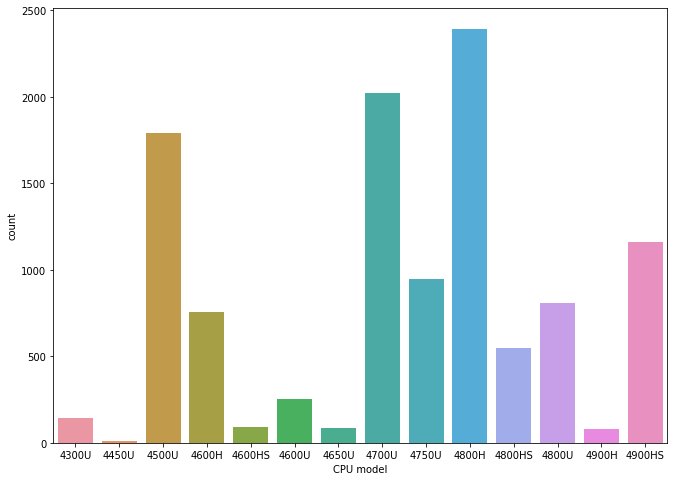

In [66]:
import os
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot


df = pd.read_excel('./result.xlsx')

# Filter Ryzens
df = df[df['CPU model'].str.contains('Ryzen')]

# Filter Linux/Windows
df = df[df['Platform'].isin(['Linux', 'Windows'])]

df['CPU model long'] = df['CPU model']
df['CPU model'] = df['CPU model'].apply(lambda x: re.search(r'4\d{3}\w+', x).group())

def plot(plot_func, *args, **kwargs):
    fig, ax = pyplot.subplots(figsize=(11, 8))
    kwargs['ax'] = ax
    plot_func(*args, **kwargs)


counts = df.groupby('CPU model')['CPU model'].count().reset_index(name='count')
plot(sns.barplot, x='CPU model', y='count', data=counts)
counts.head(20)

In [128]:
def _get_cpu_as_int(cpu):
    _, base, suffix = re.split(r"(\d+)", cpu.lower())
    return int(base) + {"u": 0, "h": 1, "hs": 2}[suffix]

df['CPU as int'] = df['CPU model'].apply(_get_cpu_as_int)

def mean_groupby(
    df, 
    group_columns=['Model', 'CPU model', 'Platform'], 
):
    return df.groupby(group_columns).mean().sort_values('CPU as int').reset_index()


df_mean = mean_groupby(df)
df_mean.head()

,Model,CPU model,Platform,Single-Core Score,Multi-Core Score,Score,CPU as int
0,LENOVO 20DT001DUS,4300U,Windows,549.0,1347.0,1896.0,4300.0
1,LENOVO 20AR005BMS,4300U,Windows,457.0,1315.0,1772.0,4300.0
2,LENOVO 20ARS0BE0T,4300U,Windows,677.0,1424.0,2101.0,4300.0
3,Dell Inc. Latitude E7440,4300U,Windows,668.0,1401.0,2069.0,4300.0
4,Dell Inc. Latitude E7440,4300U,Linux,466.5,956.0,1422.5,4300.0


,CPU model,Platform,Single-Core Score,Multi-Core Score,Score,CPU as int
0,4300U,Linux,693.571429,1399.642857,2093.214286,4300.0
1,4300U,Windows,694.500000,1671.535088,2366.035088,4300.0
2,4450U,Windows,927.000000,3499.181818,4426.181818,4450.0
3,4500U,Linux,825.908714,2894.663900,3720.572614,4500.0
4,4500U,Windows,902.735180,3677.987113,4580.722294,4500.0
5,4600U,Linux,632.767442,1156.069767,1788.837209,4600.0
6,4600U,Windows,787.004717,3011.066038,3798.070755,4600.0
7,4600H,Linux,847.750000,3497.687500,4345.437500,4601.0
8,4600H,Windows,1000.832206,5112.543978,6113.376184,4601.0
9,4600HS,Linux,1000.285714,4559.285714,5559.571429,4602.0


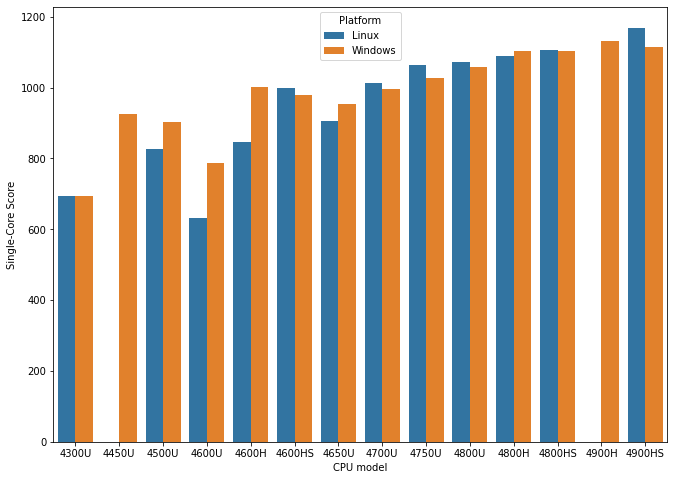

In [143]:
df_mean_cpu = mean_groupby(df, group_columns=['CPU model', 'Platform'])

plot(sns.barplot, x="CPU model", y="Single-Core Score", hue='Platform', data=df_mean_cpu)
df_mean_cpu.head(30)

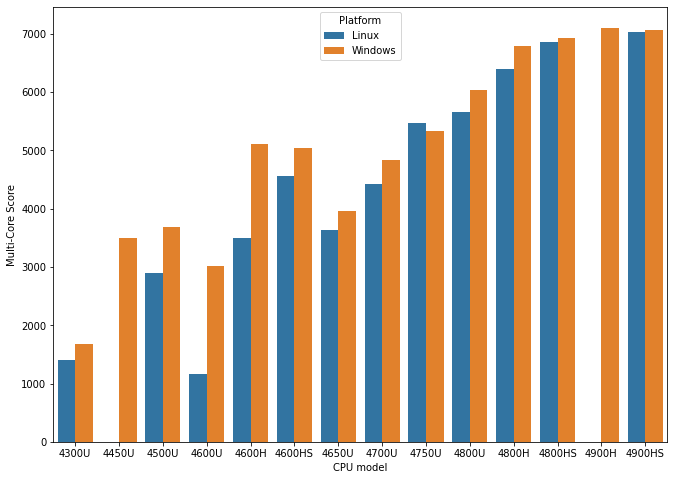

In [134]:
plot(sns.barplot, x="CPU model", y="Multi-Core Score", hue='Platform', data=df_mean_cpu)

,CPU model,Platform,Single-Core Score,Multi-Core Score,Score,CPU as int
0,4300U,Linux,693.571429,1399.642857,2093.214286,4300.0
1,4300U,Windows,694.500000,1671.535088,2366.035088,4300.0
2,4450U,Windows,927.000000,3499.181818,4426.181818,4450.0
3,4500U,Linux,825.908714,2894.663900,3720.572614,4500.0
4,4500U,Windows,902.735180,3677.987113,4580.722294,4500.0


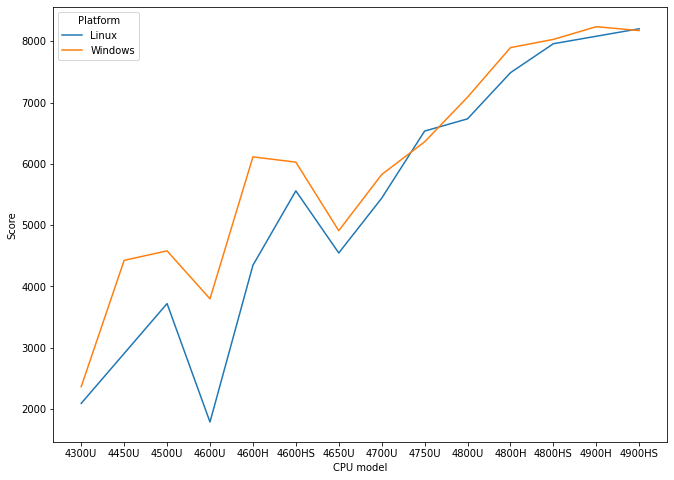

In [136]:
df['Score'] = df['Multi-Core Score'] + df['Single-Core Score']
df_mean_cpu = mean_groupby(df, group_columns=['CPU model', 'Platform'])

plot(sns.lineplot, x="CPU model", y="Score", hue='Platform', data=df_mean_cpu.reset_index())
df_mean_cpu.head()